# Graph stationarity

In this document we illustrate the concept of graph stationarity with concrete examples over synthetic and real-world data.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sn

from scipy.linalg import eigh
from tqdm import tqdm

In [ ]:
def normalize(arr):
    if np.abs(np.max(arr) - np.min(arr)) < 1e-10:
        if np.abs(np.max(arr)) < 1e-10: 
            return arr
        return arr / np.max(arr)
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

### Synthetic data

In [ ]:
nb_nodes = 30
cluster_nb = 3
mean_cluster_size = 12
inter_density = 0.05
intra_density = 0.85
graph_seed = 10

G = nx.gaussian_random_partition_graph(n=nb_nodes, s=mean_cluster_size, v=2*mean_cluster_size, p_in=intra_density, p_out=inter_density, seed=graph_seed)
coord = nx.spring_layout(G)

In [ ]:
# Vizualization of the graph clusters
#####################################

clusters_seed = 20
clusters = nx.algorithms.community.louvain.louvain_communities(G, seed=clusters_seed)
colors_dct = {0: 'r', 1: 'b', 2: 'g'}
cluster_idx_arr = np.zeros((nb_nodes))

for cl_ind in range(len(clusters)):
    for node_ind in list(clusters[cl_ind]):
        cluster_idx_arr[node_ind] = cl_ind

colors_l = [colors_dct[cluster_idx_arr[node_ind]] for node_ind in range(nb_nodes)]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_title('Clusters vizualization')
nx.draw_networkx(G, pos= coord, with_labels=True, node_color=colors_l,  ax=ax)

In [ ]:
# Vizualization of the eigenvectors shapes
##########################################

###### NOTE:
# The eigh function from scipy stores eigvals and eigvects such that the eigenvector
# corresponding to eigenvalue i (eigval[i]) is the column eigvect[:, i]

eigvals, eigvects = eigh(nx.laplacian_matrix(G).toarray())

fig, axes = plt.subplots((nb_nodes//6), 6, figsize=(6*4, (nb_nodes//6)*4))
for id in range(nb_nodes):
    nx.draw_networkx(G, pos=coord, with_labels=True, node_color=normalize(np.round(eigvects[:, id], decimals=6)), node_size=100, font_size=8, cmap='seismic', ax=axes[id//6, id%6])
    # nx.draw_networkx(G, pos=coord, with_labels=True, node_color=eigvects[:, id], node_size=100, font_size=8, cmap='seismic', ax=axes[id//6, id%6])
    axes[id//6, id%6].set_title(f'eigvec {id}')
fig.suptitle('Eigenvectors vizualization', verticalalignment='bottom')

We recall that if $y \in \mathbb{R}$ is a WS stationary signal over $G$, then its covariance matrix $C_y$ is co-diagonalizable with the combinatorial Laplacian $L$ of $G$. With the following decomposition of $L$:

$$ L = U \Lambda U^T $$

with $U = [U_1, \ldots, U_p]$ the eigenvectors of $L$, the above statement formally re-writes as:

$$ C_y =  U \Theta U^T =  \sum_{k=1}^p \theta_k U_k U_k^T $$

In other words, one should see the covariance matrix of any WS stationary graph signal $y$ as a linear combination of the rank $1$ matrices given by the $U_k U_k^T$.

In [ ]:
eigvals, eigvects = eigh(nx.laplacian_matrix(G).toarray())

fig, axes = plt.subplots((nb_nodes//6), 6, figsize=(6*4, (nb_nodes//6)*4))
for i in range(nb_nodes):
    axes[i//6, i%6].imshow(normalize(np.round(eigvects[:, i].T[:, None] * eigvects[:, i][None, :], decimals=6)))
    # _ = sn.heatmap(normalize(np.round(eigvects[:, i].T[:, None] * eigvects[:, i][None, :], decimals=6)), ax=axes[i//6, i%6],)

In [ ]:
tot_sum_cov = np.zeros((nb_nodes, nb_nodes))
for i in range(nb_nodes):
    tot_sum_cov += normalize(np.round(eigvects[:, i].T[:, None] * eigvects[:, i][None, :], decimals=6))

fig, axes = plt.subplots(1, 3, figsize=(18, 4.5))
# ax.imshow(tot_sum_cov)
_ = sn.heatmap(tot_sum_cov, ax=axes[0])
axes[0].set_title("Sum of $U^T U$ matrices")
_ = sn.heatmap(nx.adjacency_matrix(G).toarray(), ax=axes[1])
axes[1].set_title("Adjacency matrix")
_ = sn.heatmap(nx.laplacian_matrix(G).toarray(), ax=axes[2])
axes[2].set_title("Laplacian matrix")

In [ ]:
nb_nodes = 120
cluster_nb = 6
mean_cluster_size = 20
inter_density = 0.02
intra_density = 0.9
graph_seed = 8

G = nx.gaussian_random_partition_graph(n=nb_nodes, s=mean_cluster_size, v=2*mean_cluster_size, p_in=intra_density, p_out=inter_density, seed=graph_seed)
coord = nx.spring_layout(G, seed=graph_seed)

In [ ]:
# Vizualization of the graph clusters
#####################################

clusters_seed = 20
clusters = nx.algorithms.community.louvain.louvain_communities(G, seed=clusters_seed)
colors_dct = {0: 'r', 1: 'b', 2: 'g', 3:'orange', 4:'purple', 5:'brown'}
cluster_idx_arr = np.zeros((nb_nodes))

for cl_ind in range(len(clusters)):
    for node_ind in list(clusters[cl_ind]):
        cluster_idx_arr[node_ind] = cl_ind

colors_l = [colors_dct[cluster_idx_arr[node_ind]] for node_ind in range(nb_nodes)]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title('Clusters vizualization')
nx.draw_networkx(G, pos=coord, with_labels=True, node_color=colors_l,  ax=ax)

In [ ]:
eigvals, eigvects = eigh(nx.laplacian_matrix(G).toarray())

tot_sum_cov = np.zeros((nb_nodes, nb_nodes))
for i in range(nb_nodes):
    tot_sum_cov += normalize(np.round(eigvects[:, i].T[:, None] * eigvects[:, i][None, :], decimals=6))

fig, axes = plt.subplots(1, 3, figsize=(18, 4.5))
# ax.imshow(tot_sum_cov)
_ = sn.heatmap(tot_sum_cov, ax=axes[0])
axes[0].set_title("Sum of $U^T U$ matrices")
_ = sn.heatmap(nx.adjacency_matrix(G).toarray(), ax=axes[1])
axes[1].set_title("Adjacency matrix")
_ = sn.heatmap(nx.laplacian_matrix(G).toarray(), ax=axes[2])
axes[2].set_title("Laplacian matrix")

## Exploration of the influence of the graph

#### Utils

In [ ]:
def find_min_dist_rows(init_eigvects, modif_eigvects, nb_nodes):
    min_euclidean_dist = np.zeros(nb_nodes)
    for init_row_ind in range(nb_nodes):
        init_eigvect_row = init_eigvects[init_row_ind, :]
        min_dist = 10000000000
        for modif_row_ind in range(nb_nodes):
            dist = np.sum((init_eigvect_row -modif_eigvects[modif_row_ind, :])**2)
            if dist<min_dist:
                min_dist = dist
        min_euclidean_dist[init_row_ind] = min_dist
    return np.sqrt(min_euclidean_dist)


In [ ]:
def find_min_dist_cols(init_eigvects, modif_eigvects, nb_nodes):
    min_euclidean_dist = np.zeros(nb_nodes)
    for init_col_ind in range(nb_nodes):
        init_eigvect_col = init_eigvects[:, init_col_ind]
        min_dist = 10000000000
        for modif_col_ind in range(nb_nodes):
            dist = np.sum((init_eigvect_col -modif_eigvects[:, modif_col_ind])**2)
            if dist<min_dist:
                min_dist = dist
        min_euclidean_dist[init_col_ind] = min_dist
    return np.sqrt(min_euclidean_dist)


#### Computation of relevant distances over the whole dataset of initial and modified graphs

In [ ]:
from scipy.linalg import eigh

nb_nodes = 20

initial_graphs_path = "data_1/synthetic_data/graphs/clean_KNN_geo/KNN_geo_20_nodes_K_8"
modif_graph_root = "data_1/synthetic_data/graphs/KNN_geo_edges_changed"

modif_edge_prop_list = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
nb_graphs = 1000

grap_fourier_basis_dist_arr = np.empty((len(modif_edge_prop_list), nb_graphs))
grap_fourier_basis_and_inv_dist_arr = np.empty((len(modif_edge_prop_list), nb_graphs))
sum_of_possible_cov_var_dist_arr = np.empty((len(modif_edge_prop_list), nb_graphs, nb_nodes))
min_dist_of_gfb_rows_arr = np.empty((len(modif_edge_prop_list), nb_graphs, nb_nodes))
min_dist_of_gfb_cols_arr = np.empty((len(modif_edge_prop_list), nb_graphs, nb_nodes))

for graph_id in tqdm(range(nb_graphs)):
    for i, modif_edge_prop in enumerate(modif_edge_prop_list):
        
        # fecthing initial and modified graph
        initial_mat_adj = np.load(f"{initial_graphs_path}/{graph_id}_mat_adj.npy", allow_pickle=False)
        initial_G = nx.from_numpy_array(initial_mat_adj)
        _, init_eigvects = eigh(nx.laplacian_matrix(initial_G).toarray())

        modif_graph_path = f"{modif_graph_root}/KNN_geo_20_nodes_K_8_edge_prop_{modif_edge_prop}"
        modif_mat_adj = np.load(f"{modif_graph_path}/{graph_id}_mat_adj.npy", allow_pickle=False)
        modif_G = nx.from_numpy_array(modif_mat_adj)
        _, modif_eigvects = eigh(nx.laplacian_matrix(modif_G).toarray())
        
        # computing the distance between the graph Fourier basis
        grap_fourier_basis_dist_arr[i, graph_id] = np.linalg.norm(x=init_eigvects-modif_eigvects)
        grap_fourier_basis_and_inv_dist_arr[i, graph_id] = np.linalg.norm(x=init_eigvects-modif_eigvects.T)

        # computing the minimal distance between each row of the initial GFB and those of the modified ones
        # a given row of the modified GFB can be chosen several times as argmin
        min_dist_of_gfb_rows_arr[i, graph_id, :] = find_min_dist_rows(init_eigvects, modif_eigvects, nb_nodes)
        min_dist_of_gfb_cols_arr[i, graph_id, :] = find_min_dist_cols(init_eigvects, modif_eigvects, nb_nodes)

        # computing the distances between the possible covariance matrices
        for k in range(nb_nodes):
            init_sum_cov_k = init_eigvects[:, k].T[:, None] * init_eigvects[:, k][None, :]
            modif_sum_cov_k = modif_eigvects[:, k].T[:, None] * modif_eigvects[:, k][None, :]
            sum_of_possible_cov_var_dist_arr[i, graph_id, k] = np.linalg.norm(x=init_sum_cov_k-modif_sum_cov_k)

# computing statistics
graph_fourier_dist_mean = np.mean(grap_fourier_basis_dist_arr, axis=1)
graph_fourier_dist_std = np.std(grap_fourier_basis_dist_arr, axis=1)
grap_fourier_basis_and_inv_dist_mean = np.mean(grap_fourier_basis_and_inv_dist_arr, axis=1)
grap_fourier_basis_and_inv_dist_std = np.std(grap_fourier_basis_and_inv_dist_arr, axis=1)
sum_of_possible_cov_var_dist_mean = np.mean(sum_of_possible_cov_var_dist_arr, axis=(1, 2))
sum_of_possible_cov_var_dist_std = np.std(sum_of_possible_cov_var_dist_arr, axis=(1, 2))


#### On the distance between the GFB

[6.1199, 6.2301, 6.2722, 6.2957, 6.3083, 6.3273, 6.3519, 6.376, 6.3823, 6.3636]
[0.3587, 0.3126, 0.2629, 0.2355, 0.2213, 0.2064, 0.2074, 0.196, 0.1885, 0.1907]


Text(0.5, 1.0, 'Frobenius norm of the difference between the initial GFB and the modified one')

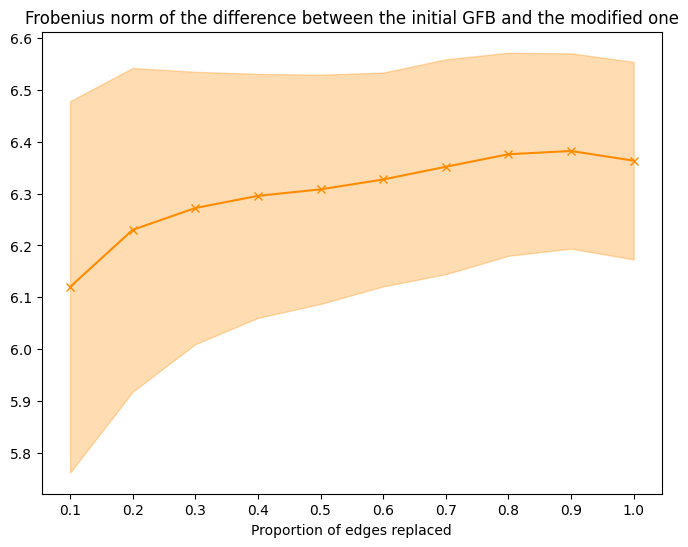

In [16]:
print([round(float(dist), 4) for dist in graph_fourier_dist_mean.tolist()])
print([round(float(std), 4) for std in graph_fourier_dist_std.tolist()])

y = graph_fourier_dist_mean
y_err = graph_fourier_dist_std
x = np.asarray(range(1, len(graph_fourier_dist_mean)+1))
color = 'darkorange'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y, c=color, marker='x')
ax.fill_between(x, y1=y-y_err, y2=y+y_err, color=color, alpha=0.3)

x_tick_labels = [str(i/20) for i in range(2, 22, 2)]
x_tick_pos = list(range(1, 11))
ax.set_xticks(x_tick_pos, x_tick_labels)
ax.set_xlabel('Proportion of edges replaced')
ax.set_title('Frobenius norm of the difference between the initial GFB and the modified one')

#### On the distance between the covariance matrices atoms derived from the GFB

[1.1315, 1.2269, 1.2752, 1.297, 1.3081, 1.313, 1.3154, 1.3182, 1.3226, 1.2968]
[0.3997, 0.3419, 0.3157, 0.3072, 0.3048, 0.3051, 0.3056, 0.3064, 0.3079, 0.3809]


Text(0.5, 1.0, 'Sum of the Frobenius norm of the difference between the covariance matrix\n atoms given by the initial GFB and the modified one')

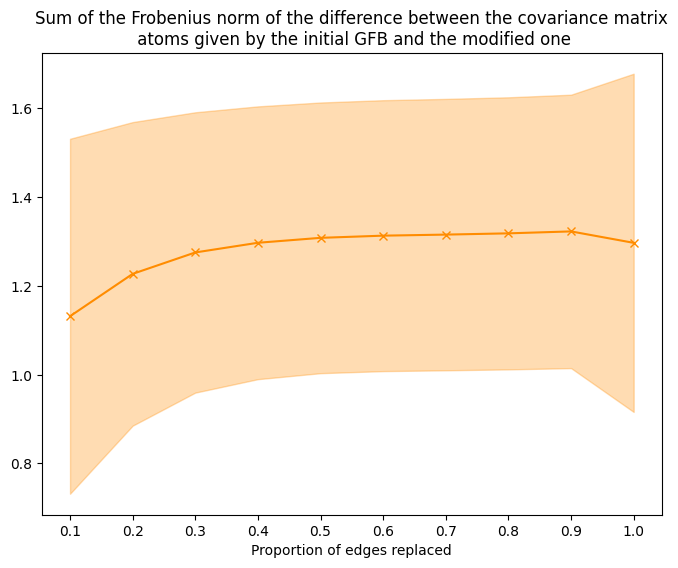

In [17]:
print([round(float(dist), 4) for dist in sum_of_possible_cov_var_dist_mean.tolist()])
print([round(float(std), 4) for std in sum_of_possible_cov_var_dist_std.tolist()])

y = sum_of_possible_cov_var_dist_mean
y_err = sum_of_possible_cov_var_dist_std
x = np.asarray(range(1, len(graph_fourier_dist_mean)+1))
color = 'darkorange'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y, c=color, marker='x')
ax.fill_between(x, y1=y-y_err, y2=y+y_err, color=color, alpha=0.3)

x_tick_labels = [str(i/20) for i in range(2, 22, 2)]
x_tick_pos = list(range(1, 11))
ax.set_xticks(x_tick_pos, x_tick_labels)
ax.set_xlabel('Proportion of edges replaced')
ax.set_title('Sum of the Frobenius norm of the difference between the covariance matrix\n atoms given by the initial GFB and the modified one')

#### On the distance between subset of the eigenvectors composing the GFB

In [18]:
# when considering all the eigenvectors
print([round(float(dist), 4) for dist in np.mean(min_dist_of_gfb_cols_arr, axis=(1, 2)).tolist()])

[0.9191, 0.9824, 1.0092, 1.0282, 1.0339, 1.0334, 1.0223, 0.9996, 0.9509, 0.6849]


In [19]:
# when considering only the closest of the initial and modified basis
print(np.mean(np.min(min_dist_of_gfb_cols_arr, axis=2), axis=1))

[0.06695922 0.18395543 0.26274882 0.358364   0.39411167 0.43792519
 0.42840466 0.36427729 0.22022231 0.02059278]


[0.7022, 0.823, 0.8774, 0.9119, 0.921, 0.917, 0.8926, 0.8407, 0.7292, 0.1724]
[0.3018, 0.2724, 0.2542, 0.2385, 0.2317, 0.2193, 0.2189, 0.2319, 0.2778, 0.3371]


Text(0.5, 1.0, 'Euclidean distance between subset of the initial\n BFG and the modified one')

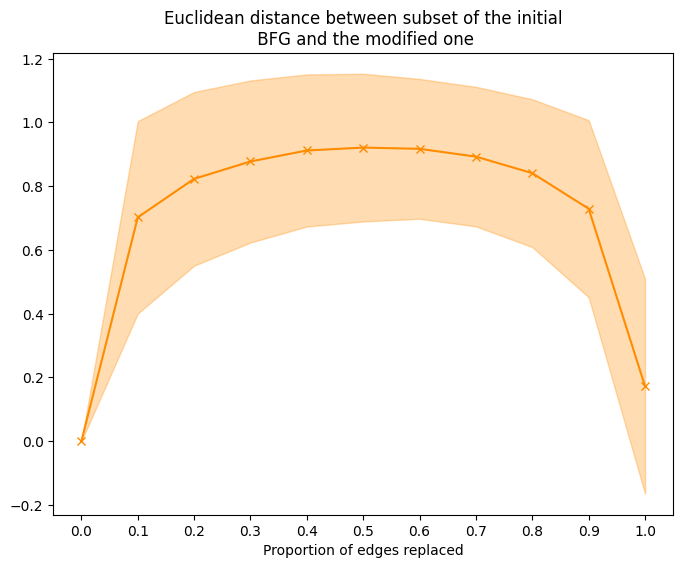

In [20]:
##-----------------------
NB_DIM = 10
##-----------------------

eigvect_subset_distances_mean = np.mean(np.sort(min_dist_of_gfb_cols_arr, axis=2)[:, :, :NB_DIM], axis=(1, 2))
eigvect_subset_distances_std = np.std(np.sort(min_dist_of_gfb_cols_arr, axis=2)[:, :, :NB_DIM], axis=(1, 2))

print([round(float(dist), 4) for dist in eigvect_subset_distances_mean.tolist()])
print([round(float(std), 4) for std in eigvect_subset_distances_std.tolist()])

y = np.concatenate(([0], eigvect_subset_distances_mean))
y_err = np.concatenate(([0], eigvect_subset_distances_std))
x = np.asarray(range(0, len(y_err)))
color = 'darkorange'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y, c=color, marker='x')
ax.fill_between(x, y1=y-y_err, y2=y+y_err, color=color, alpha=0.3)

x_tick_labels = [str(i/20) for i in range(0, 22, 2)]
x_tick_pos = list(range(0, 11))
ax.set_xticks(x_tick_pos, x_tick_labels)
ax.set_xlabel('Proportion of edges replaced')
ax.set_title('Euclidean distance between subset of the initial\n BFG and the modified one')